In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.patches as patches
from PIL import Image
import matplotlib.image as mpimg
import pandas as pd
import math
from tqdm import tqdm_notebook as tqdm
figures = 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/Figures/'
processed= 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/processed/'

## Description of a problem: The idea to is to normalize occupancy of bands in a rectangle. 
    The process here is to generate a BW image with bands each increasing radius by 7.5 cm. 
    If we then calculate the amount of pixels in the first band - 
    circle of 7.5cm diameter it should give correct correction for how many pixels in 175 cm**2.
    But if we use this number to calculate the overall area of the rectange from all the histograms is is by about 2500cm**2 off
    Why? or rather how to make this better?? 

In [3]:
cut = 0 # keeping the cut where rectangle of arena ends
X_cut_min = -.59
Y_cut_max = 1.61
X_cut_max = .12
Y_cut_min = .00
print("area %s M*2" %((X_cut_max-X_cut_min)*(Y_cut_max-Y_cut_min))) 

x_max, x_min = 0.12, -0.59
x_offset = x_max - (x_max - x_min)/2
y_max, y_min = 1.61,  0
y_offset = y_max - (y_max - y_min)/2
print(x_offset,y_offset)

# to center the zero in... 
xcut_offset=-.24
ycut_offset=-.8

cut=0

area 1.1431 M*2
-0.235 0.805


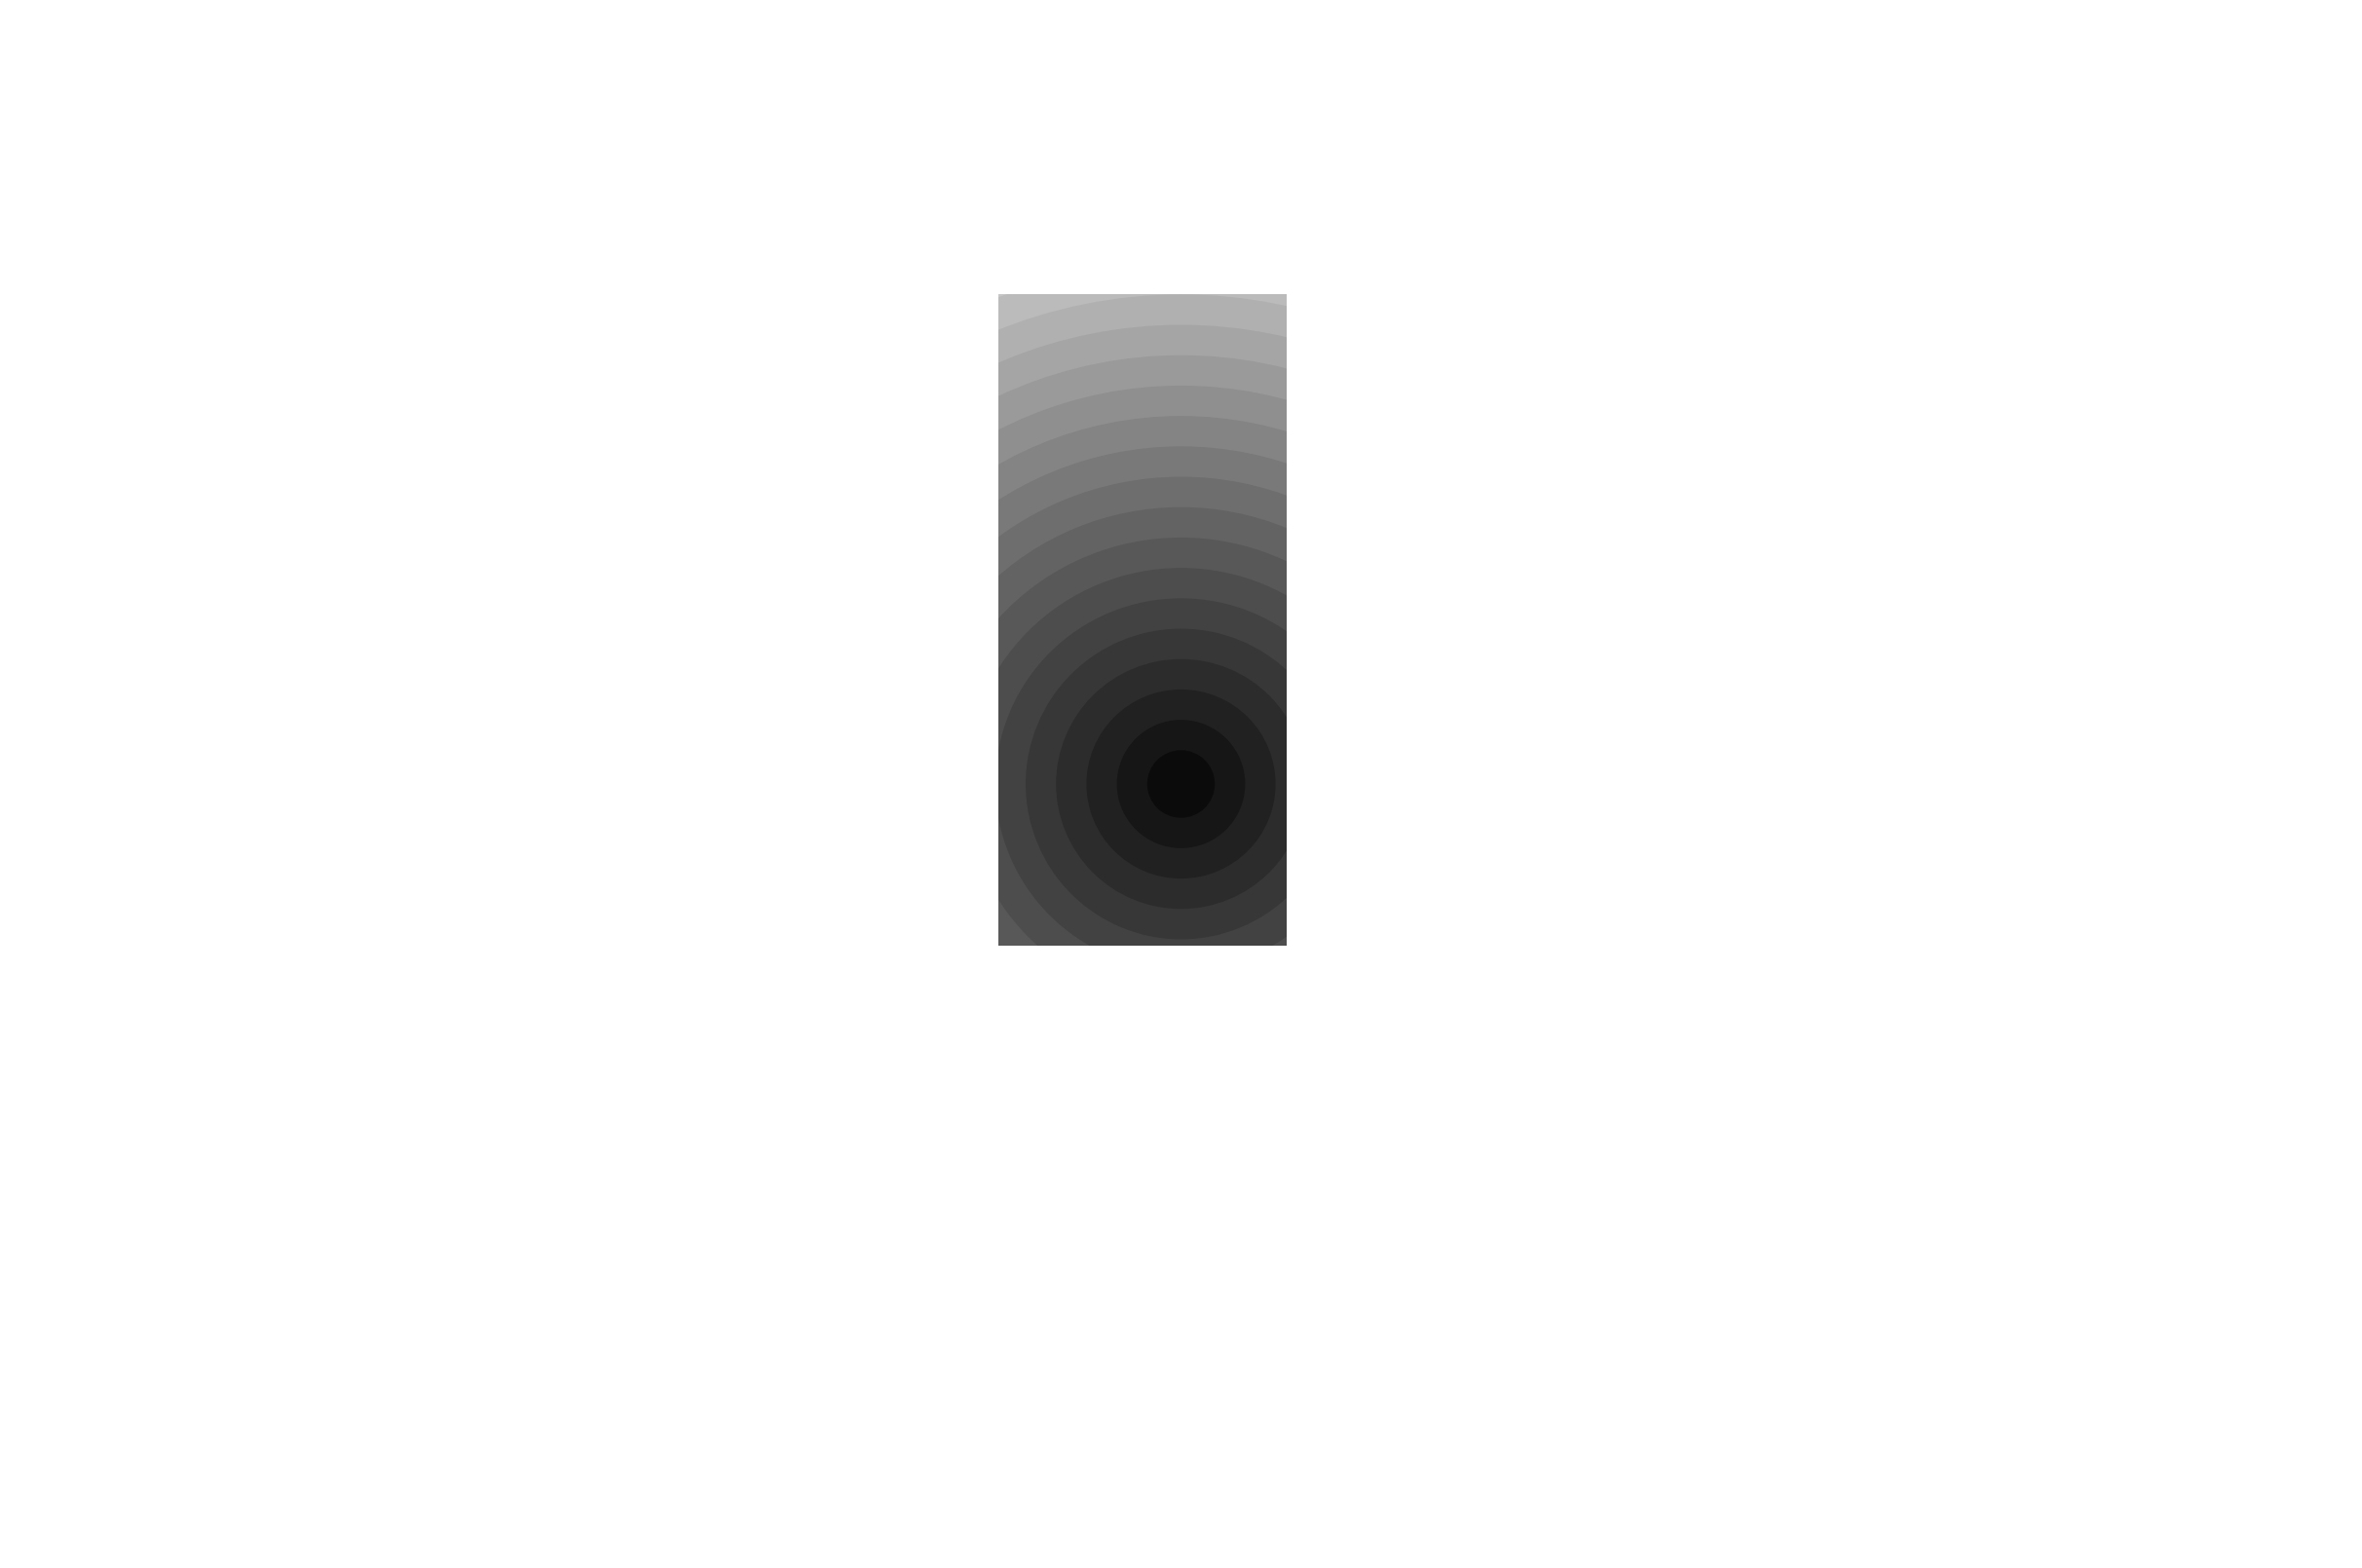

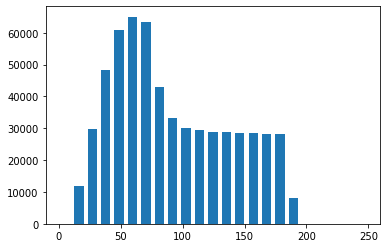

In [10]:
def Normalize (center=(.1,-.4),dpi=500,X_cut_min = -.59 -xcut_offset,Y_cut_max = 1.61
               + ycut_offset,X_cut_max = .12-xcut_offset,Y_cut_min = .00 +ycut_offset,bands=23 ):
    """make visual count it by area then have hist values for normalization wih movement data
        to be exported and then can be counted
    
    PARAMS
    ------------
    center : tuple 
        where beacon is 
    dpi : int 
        dots per inch - resolution - if changed can mess up pixel count
    X_cut,Y_cut : int
        points of rectagle, same as used for cutting of rears - floor of arena  
        
    bands : int 
        amount of circles fittign inthe rectangle - max is 23 
        
    Returns
    ------------
    Histogram and appropriate bins made by the histogram
    Used for area estimation later on

    """
    
    fig, ax1 = plt.subplots(1, 1, sharex=True,dpi=dpi,)
    fig.patch.set_visible(False)
    rectangle = patches.Rectangle((X_cut_min,Y_cut_min), (abs(X_cut_min)+abs(X_cut_max)),abs(Y_cut_min)+abs(Y_cut_max) , color="white")
    ax1.add_patch(rectangle)
    #plt.plot(center[0],center[1], "ro")
    color = np.linspace(0,.99,bands+1)
    for i in reversed(range(bands)):
        c=color[i]
        patch = patches.Circle((center[0],center[1]), radius=.075*i,color=str(c))
        ax1.add_patch(patch)
        patch.set_clip_path(rectangle)                  
    ax1.axis("equal")
    ax1.axis("off")
    fig.savefig(figures + 'norm_graph.png', dpi=dpi, transparent=True)
    img= Image.frombytes('RGB',fig.canvas.get_width_height(),fig.canvas.tostring_rgb())
    image_array = np.asarray(img)
    hist, bins = np.histogram(image_array,bins=bands,range=(0,249))
    plt.show()
    #plt.hist(image_array.ravel(), bins=bands, range=(0,249))
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    return hist,bins 
    
hist,bins = Normalize()

In [11]:
hist, bins

(array([    0, 11730, 29922, 48279, 60843, 65025, 63423, 42948, 33300,
        29928, 29346, 28920, 28728, 28581, 28470, 28344, 28236,  8013,
           36,     0,     0,     0,     0], dtype=int64),
 array([  0.        ,  10.82608696,  21.65217391,  32.47826087,
         43.30434783,  54.13043478,  64.95652174,  75.7826087 ,
         86.60869565,  97.43478261, 108.26086957, 119.08695652,
        129.91304348, 140.73913043, 151.56521739, 162.39130435,
        173.2173913 , 184.04347826, 194.86956522, 205.69565217,
        216.52173913, 227.34782609, 238.17391304, 249.        ]))

### Calculate area of each pixel - Sanity check  
Here we wanto get back the original size of arena in cm**2
1.Calculate size of arena 
2.Calculate size of circle - in cm**2 
3. How many pixels in first bin/ first circle (11730)
4. divide 175/11730 to get to how many pixels per cm2... in order for it to add up it shoudl be around 52.
5. But it is not. - so The eeror must bein the pixel counting in the normlaize function...

In [14]:
from math import pi
r = 7.5
r2=15
print ("The area of the circle with radius " + str(r) + "cm is: " + str(pi * r**2))
area = pi * r**2
area2 = pi * r2**2
circle = hist[1]
pix_cm = circle/area
print("Amount of pixels in that circle: %s" %(circle))
print ("There are %s pixels in %s cm**2" %(hist[1],(circle/pix_cm)))
print ("%s pixels per 1 cm**2" %(pix_cm))
print ("The area of the arena is : %s M*2" %((X_cut_max-X_cut_min)*(Y_cut_max-Y_cut_min)))


The area of the circle with radius 7.5cm is: 176.71458676442586
Amount of pixels in that circle: 11730
There are 11730 pixels in 176.71458676442583 cm**2
66.37822159885982 pixels per 1 cm**2
The area of the arena is : 1.1431 M*2


The area of the arena is : 1.1431 M*2


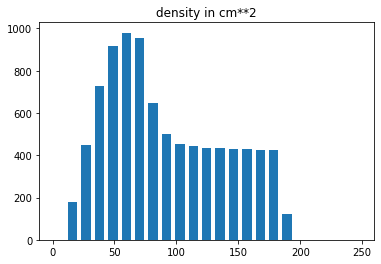

The area of the arena in concetric circles after calculation is : 8949.802897554646 cm*2


1.1431

In [15]:
k= hist/pix_cm # should be more like 52 pixels per cm... 
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
print ("The area of the arena is : %s M*2" %((X_cut_max-X_cut_min)*(Y_cut_max-Y_cut_min)))
plt.bar(center, k, align='center', width=width)
plt.title("density in cm**2")
plt.show()
print ("The area of the arena in concetric circles after calculation is : %s cm*2" %(k.sum()))
difference = ((X_cut_max-X_cut_min)*(Y_cut_max-Y_cut_min)) 
difference